# Title

**Exercise 1 - Regularization and Decision Boundaries in Logistic Regression**

# Description

The goal of the exercise is to produce a plot similar to the one given below, by performing classification predictions on a logistic regression model .

<img src="./image/image.png" style="width: 500px;">

# Instructions: 
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit logistic regression models and interpret results
- Compute the accuracy of the model.
- Plot the classification boundaries against the two predictors
- Fit an untuned regularized logistic regression model and compare the classification boundary

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.accuracy_score()</a> : Accuracy classification score

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
heart = pd.read_csv('./data/Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
#heart.head()
heart.describe()


(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109) #se non diamo X_set e Y_set ma l'intero dataset (heart) 
# allora ci ritorna una semplice partizione 80-20 del dataset che  manipoleremo dopo per avere x e y di ciascuno

**Q1.1** Below we fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates, and interpret general trends.

In [ ]:
degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors]) #traformo le feeatures in polinomiali
y_train = heart_train['AHD']


logit1 = LogisticRegression(penalty=None, max_iter = 5000).fit(X_train1, y_train) #alleno modello con features polinomiali

print("Logistic Regression Estimated Betas:",
      logit1.coef_,logit1.intercept_)

#antoher way
from sklearn.pipeline import make_pipeline


logit1 = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LogisticRegression(penalty=None, max_iter=5000))
logit1.fit(X_train1, y_train)

print("Logistic Regression Estimated Betas:",
      logit1.named_steps['logisticregression'].coef_,
      logit1.named_steps['logisticregression'].intercept_)



Logistic Regression Estimated Betas: [[ 0.02585431 -0.03884871]] [4.32578029]
Logistic Regression Estimated Betas: [[ 0.02585431 -0.03884871]] [4.32578029]


*your interpretation here*

# I coefficienti (coef_) indicano quanto cambia il log-odds (logaritmo del rapporto tra probabilità di successo e insuccesso) di avere AHD per ogni unità in più di Age o MaxHR, mantenendo costanti gli altri predittori
As we can see, the 'Age' coefficient is positive, so there is a direct dependency with the probability to have AHD. On the other hand the dependency for the feature MaxHR is inverse, so the more the MaxHR increases, the more the probability to have AHD decreases.

# L’intercetta è il log-odds di AHD quando Age e MaxHR sono zero (spesso non ha un’interpretazione pratica diretta, ma è necessaria per il calcolo delle probabilità).

**Q1.1** Fit an unregularized 4th order polynomial (with interactions) logistic regression model (`logit4`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates.

In [14]:
### edTest(test_logit4) ###

degree = 4
predictors = ['Age','MaxHR']

X_train4 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])

logit4 = LogisticRegression(penalty=None, max_iter = 5000).fit(X_train4, y_train)

print("Logistic Regression Estimated Betas:",
      logit4.coef_,logit4.intercept_)


Logistic Regression Estimated Betas: [[ 1.08371186e-05  3.55119913e-05  1.73332506e-04  5.53411369e-04
   1.84614474e-03  3.82328955e-04 -3.84304464e-04  1.08441062e-04
  -3.29093438e-05 -3.78071960e-06  2.04971915e-06  4.74001665e-07
  -3.16301791e-07  1.00760059e-07]] [4.61769452e-07]


**Q1.2** Evaluate the models based on misclassification rate in both the test set. 

In [ ]:
### edTest(test_misclass) ###

######
# your code here
######

predictors = ['Age','MaxHR']
X_test1 = PolynomialFeatures(degree=1,include_bias=False).fit_transform(heart_test[predictors]) #anche se sul test set dovremmo fare SOLO transfomr (dopo aver fatto fit_transform sul train), poi faccio fit del modello sulla
#nuova x_train e predict sulla nuova x_test
X_test4 = PolynomialFeatures(degree=4,include_bias=False).fit_transform(heart_test[predictors])
y_test = heart_test['AHD']

# use logit.score()
misclass_logit1 = 1- logit1.score(X_test1, y_test) #score ritorna l'accuracy di un eventuale predict
misclass_logit4 = 1 - logit4.score(X_test4, y_test) 

print("Overall misclassification rate in test for logit1:",misclass_logit1)
print("Overall misclassification rate in test for logit4:",misclass_logit4)


Overall misclassification rate in test for logit1: 0.27472527472527475
Overall misclassification rate in test for logit4: 0.31868131868131866


The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [17]:

#!PLOT PREDIZIONI SU TUTTE LE COMBINAZIONI DELE 2 INPUT FEATURES
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2) #crea due matrici 2D che rappresentano tutte le possibili combinazioni di valori tra x1 e x2.
#x1v avra esattamente x1 su ogni riga
#x2v avra esattamente x2 su ogni colonna

#Esempio: Se x1 = [1, 2, 3] e x2 = [10, 20],
#allora
#x1v = [[1, 2, 3], [1, 2, 3]]
#x2v = [[10, 10, 10], [20, 20, 20]]

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2)) #! crea una matrice di 2 colonne e il numero di righe necessarie, di solito si fa cosi

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()] #!ravel crea vista, flatten() crea copia indipendente
#!c_ affianca i due array su colonne diverse (a differenza di r_ che mette tutti i dati che gli passiamo su un'unica riga)
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)


yhat1 = logit1.predict(X_dummy)


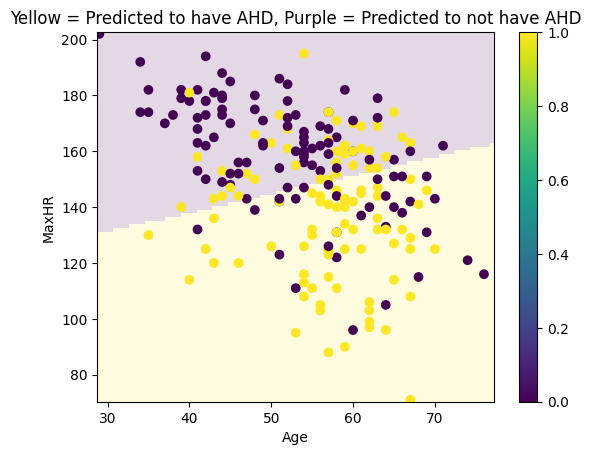

In [ ]:

plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.15) #plotta la decision boundary, ovvero la linea di separazione ai lati della quale il modello cambia classe di predizione
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD']) #plotta i dati reali, i punti reali con le loro vere etichette
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()



c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


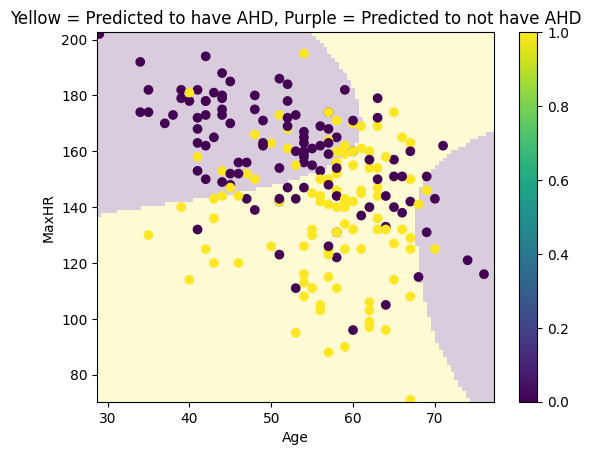

In [37]:
#Perform the same calculation above, but for the 4th order polynomial
# Fit solo sul training
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_train4 = poly4.fit_transform(heart_train[predictors])


X_dummy = poly4.transform(X) #! dovremmo fare fit_transform del polynomial feature sul training set e poi fare SOLO .transform dello stesso poly sul test set da predictare
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.2) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()


**Q1.3** Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?

Il modello con polinomio di grado 4 ha una capacità molto maggiore rispetto a quello di grado 1 e quindi è più soggetto a overfitting: riesce a seguire anche le fluttuazioni casuali dei dati di training, creando una decision boundary molto complessa e poco generalizzabile ai dati di test.

Il modello di grado 1 invece produce una boundary più semplice e robusta, meno sensibile al rumore.

Il modello con polinomio di grado 4 ha una capacità molto maggiore rispetto a quello di grado 1 e quindi è più soggetto a overfitting: riesce a seguire anche le fluttuazioni casuali dei dati di training, creando una decision boundary molto complessa e poco generalizzabile ai dati di test.


**Q1.4** Fit a ridge-like Logistic Regression model with `C=0.0001` on the 4th order polynomial as before.  Compare this regularized model with the unregularized one by using the classification boundary.

In [ ]:
### edTest(test_ridge) ###

logit_ridge = LogisticRegression(penalty='l2', C = 0.0001, max_iter = 5000).fit(X_train4, y_train) #l2 = ridge
#solver 

# solver : {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'
Algorithm to use in the optimization problem. Default is 'lbfgs'. To choose a solver, you might want to consider the following aspects:

For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;
For multiclass problems, all solvers except 'liblinear' minimize the full multinomial loss;
'liblinear' can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrap it with the ~sklearn.multiclass.OneVsRestClassifier.
'newton-cholesky' is a good choice for n_samples >> n_features * n_classes, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features * n_classes because it explicitly computes the full Hessian matrix.
warning

The choice of the algorithm depends on the penalty chosen and on (multinomial) multiclass support:

solver	penalty	multinomial multiclass
'lbfgs'	'l2', None	yes
'liblinear'	'l1', 'l2'	no
'newton-cg'	'l2', None	yes
'newton-cholesky'	'l2', None	yes
'sag'	'l2', None	yes
'saga'	'elasticnet', 'l1', 'l2', None	yes
note

'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

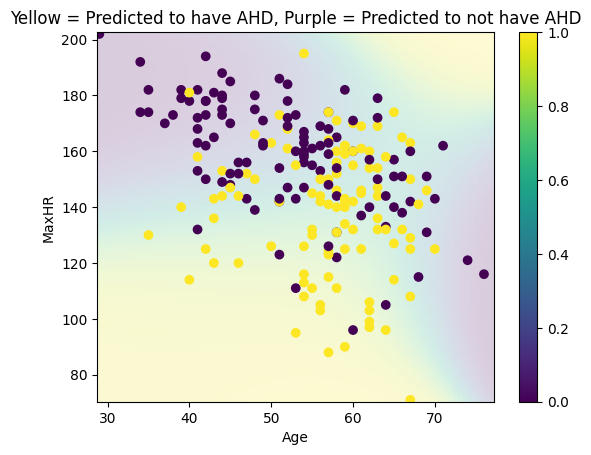

In [ ]:

#yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1]
yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1] #la probabilita e nella seconda colonna. Nella prima c'e l'indice della feature

plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape),alpha = 0.2) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()
